## Exercise 3 (p.332, Chap.8), 5 (p.332, Chap.8), 8 (p.333, Chap.8), 9 (p.334, Chap.8) and 10 (p.334, Chap.8)

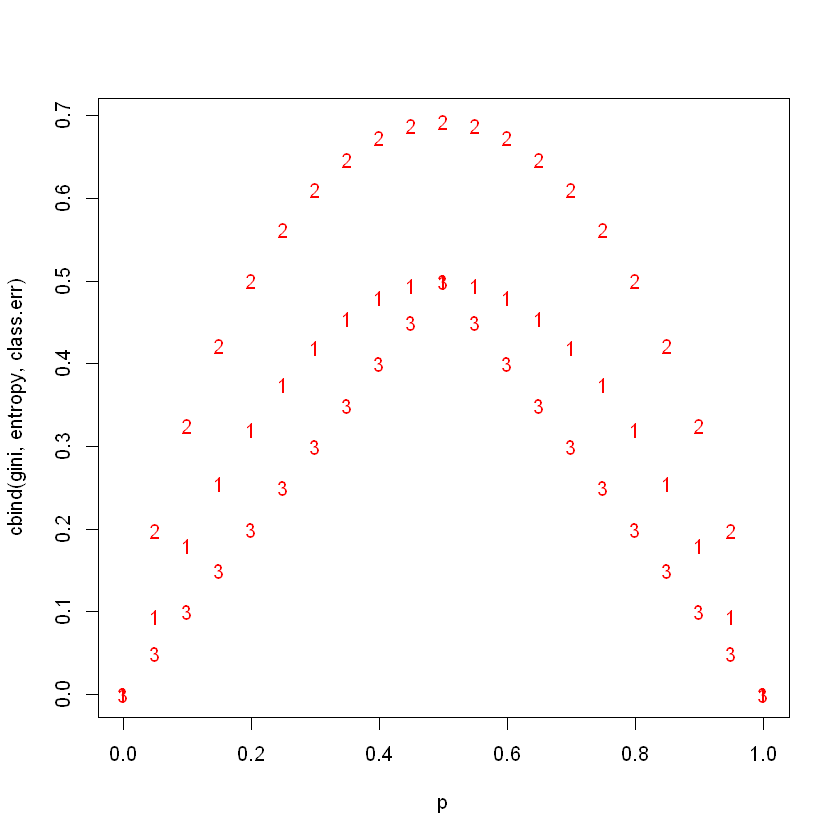

In [8]:
#Exercise 3
p = seq(0, 1, 0.05)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, class.err), col = c("red"))

### Exercise 5
Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?

In [13]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
#mean
mean(p)
#majority
sum(p >= 0.5) > sum(p < 0.5)

[1] 0.45

[1] TRUE

#### Using the majority approach there are more red predictions than green.
#### Using the mean approach there are more green predictions than red



### Exercise 8
In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

In [17]:
# Part A Split the data set into a training set and a test set.
install.packages('ISLR')
library('ISLR')
attach(Carseats)
set.seed(1)

train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpuiDT2D\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [22]:
#B Fit a regression tree to the training set. Plot the tree, and interpret
#the results. What test MSE do you obtain?
install.packages("tree")
library('tree')
tree.carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

Warning message:
"package 'tree' is in use and will not be installed"


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

[1] 4.922039

#### our mse is 4.92

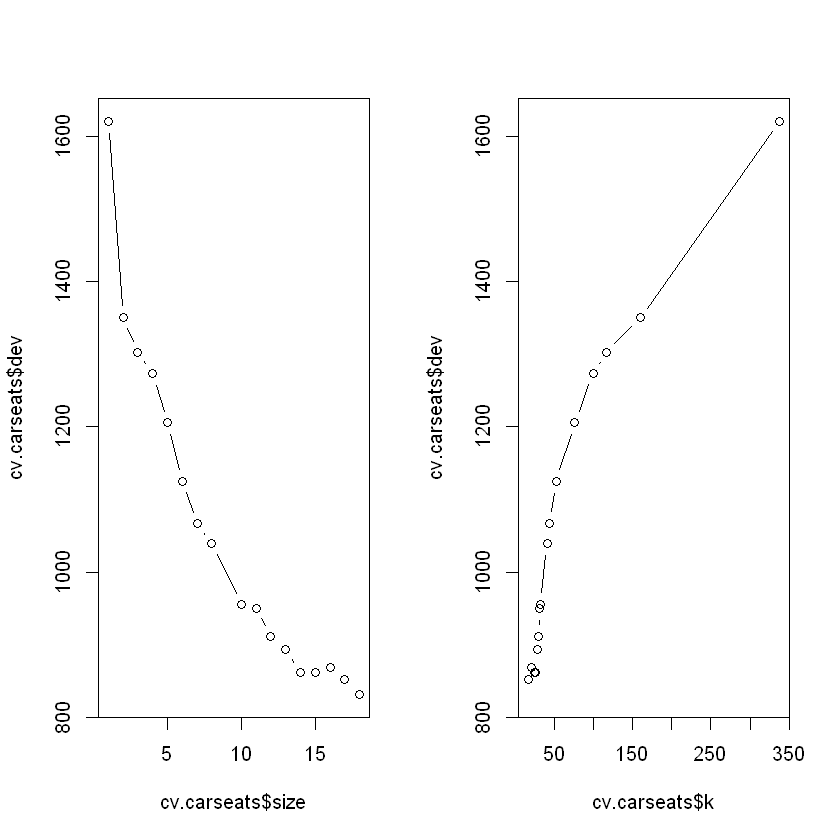

In [23]:
#Part C Use cross-validation in order to determine the optimal level of
#tree complexity. Does pruning the tree improve the test MSE?

cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")


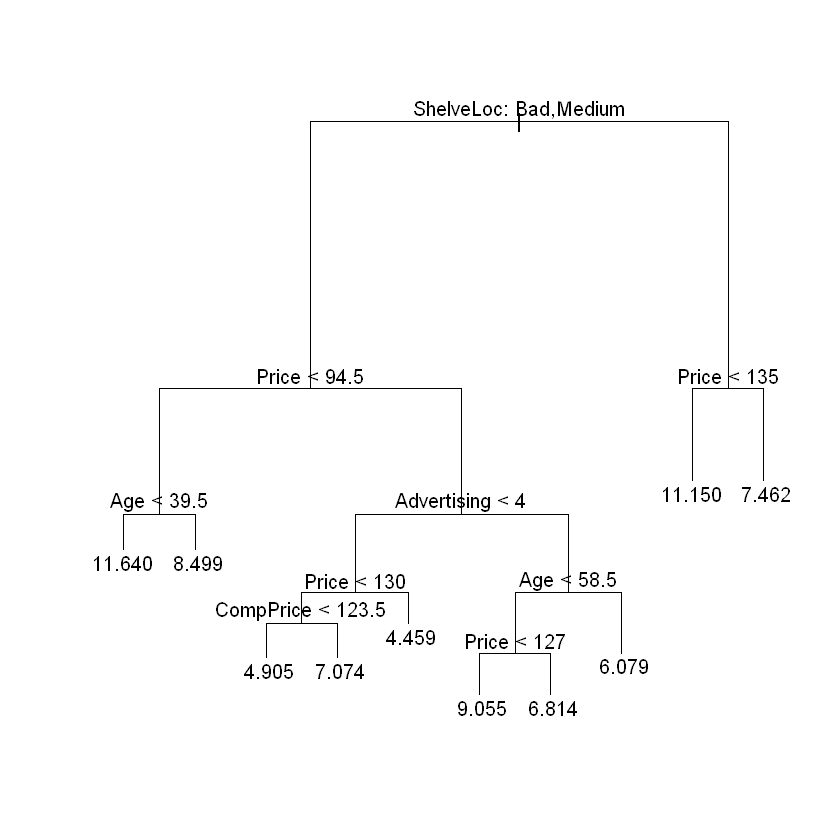

In [24]:
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [25]:
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

[1] 4.918134

#### our mse is slightly better at 4.918 after pruning

In [28]:
#Part D Use the bagging approach in order to analyze this data. What
#test MSE do you obtain? Use the importance() function to determine
#which variables are most important.

install.packages('randomForest')
library('randomForest')

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpuiDT2D\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [29]:
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)

[1] 2.657296

In [30]:
importance(bag.carseats)


,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


In [31]:
#E Use random forests to analyze this data. What test MSE do you
#obtain? Use the importance() function to determine which variables
#aremost important. Describe the effect of m, the number of
#variables considered at each split, on the error rate
#obtained.

rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)
importance(rf.carseats)

[1] 2.701665

,%IncMSE,IncNodePurity
CompPrice,19.8160444,162.73603
Income,2.8940268,106.96093
Advertising,11.6799573,106.30923
Population,-1.6998805,79.04937
Price,46.3454015,448.33554
ShelveLoc,40.4412189,334.33610
Age,12.5440659,169.06125
Education,1.0762096,55.87510
Urban,0.5703583,13.21963
US,5.8799999,25.59797


#### random forests makes the mse worse; shelveloc and price are big predictors of sales

### Question 9 This problem involves the OJ data set which is part of the ISLR
### package.

In [32]:
#part a Create a training set containing a random sample of 800 observations,
#and a test set containing the remaining observations.
attach(OJ)
set.seed(1013)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [33]:
#part b Fit a tree to the training data, with Purchase as the response
#and the other variables as predictors. Use the summary() function
#to produce summary statistics about the tree, and describe the
#results obtained. What is the training error rate? How many
#terminal nodes does the tree have?

oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "SalePriceMM"  
Number of terminal nodes:  7 
Residual mean deviance:  0.7564 = 599.8 / 793 
Misclassification error rate: 0.1612 = 129 / 800 

In [34]:
#part c
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 )  
      10) PriceDiff < 0.065 75   75.06 MM ( 0.20000 0.80000 ) *
      11) PriceDiff > 0.065 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 )  
        24) SalePriceMM < 1.64 22   20.86 MM ( 0.18182 0.81818 ) *
        25) SalePriceMM > 1.64 57   76.88 CH ( 0.59649 0.40351 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

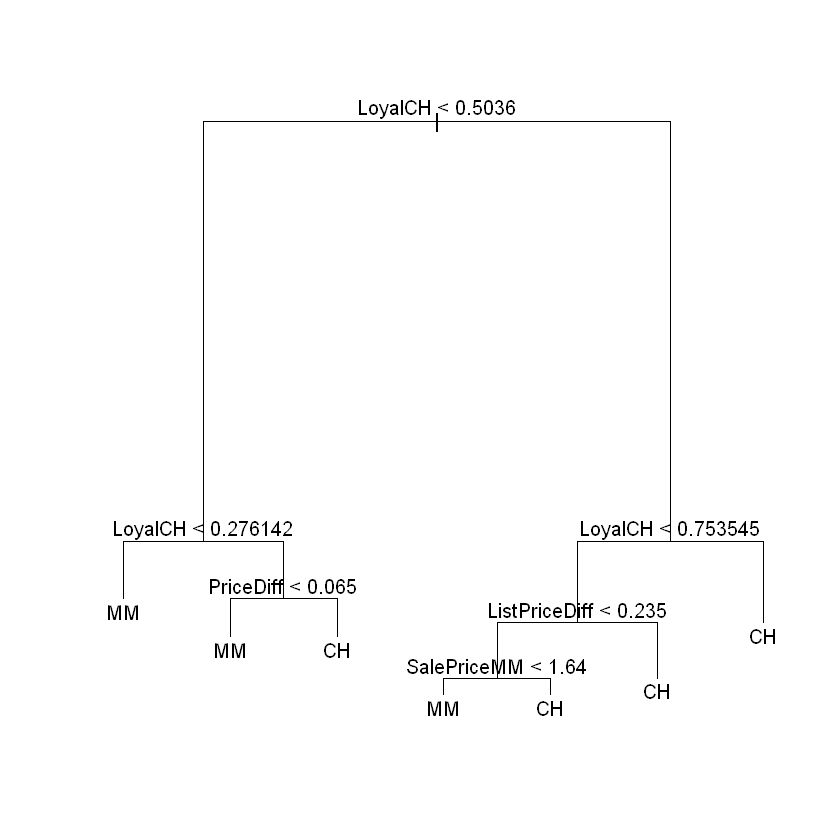

In [35]:
#part d Create a plot of the tree, and interpret the results.
plot(oj.tree)
text(oj.tree, pretty = 0)

In [36]:
# part e Predict the response on the test data, and produce a confusion
#matrix comparing the test labels to the predicted test labels.
#What is the test error rate?

oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 149  15
  MM  30  76

In [37]:
# part f Apply the cv.tree() function to the training set in order to
#determine the optimal tree size. 
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

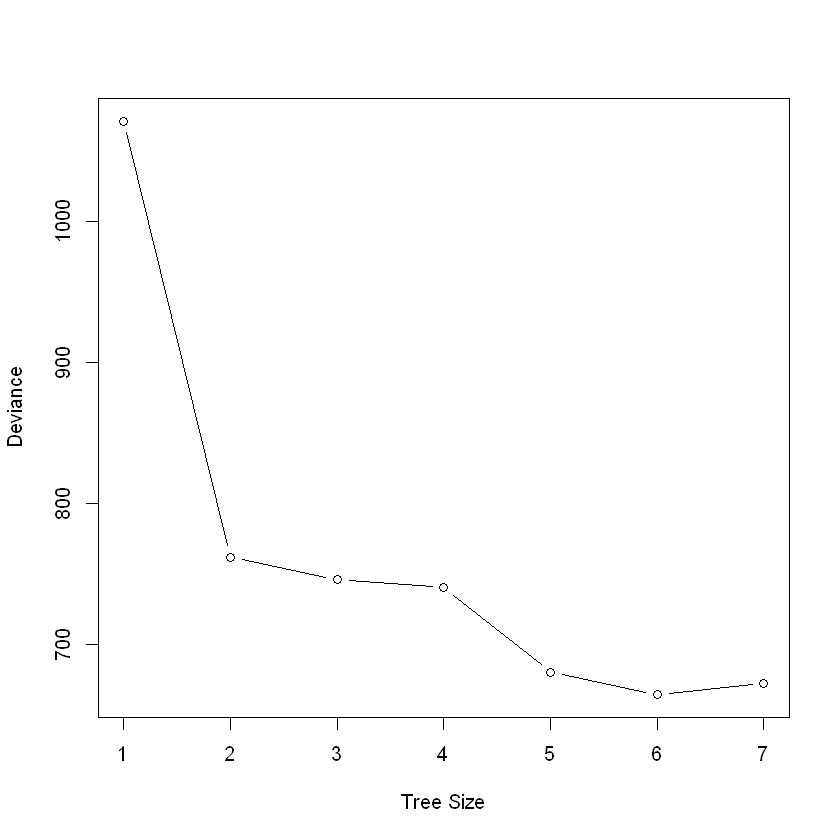

In [38]:
#g Produce a plot with tree size on the x-axis and cross-validated
#classification error rate on the y-axis.
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

In [39]:
#part h Which tree size corresponds to the lowest cross-validated classification
#error rate?
Size of 6 gives lowest cross-validation error.



In [40]:
# part i Produce a pruned tree corresponding to the optimal tree size
#obtained using cross-validation. If cross-validation does not lead
#to selection of a pruned tree, then create a pruned tree with five
#terminal nodes.
oj.pruned = prune.tree(oj.tree, best = 6)


In [41]:
#part j Compare the training error rates between the pruned and unpruned
# trees. Which is higher?
summary(oj.pruned)



Classification tree:
snip.tree(tree = oj.tree, nodes = 12L)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7701 = 611.5 / 794 
Misclassification error rate: 0.175 = 140 / 800 

In [ ]:
#the pruned tree has a higher rate

In [42]:
#part k Compare the test error rates between the pruned and unpruned
#trees. Which is higher?
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1666667

In [43]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.2

#### unpruned has a better rate

### Exercise 10 

In [45]:
#part a Remove the observations for whom the salary information is
#unknown, and then log-transform the salaries.
sum(is.na(Hitters$Salary))
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))

[1] 59

[1] 0

In [46]:
#part b Create a training set consisting of the first 200 observations, and
#a test set consisting of the remaining observations.
train = 1:200
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

In [49]:
#part c Perform boosting on the training set with 1,000 trees for a range
#of values of the shrinkage parameter λ. Produce a plot with
#different shrinkage values on the x-axis and the corresponding
#training set MSE on the y-axis.
install.packages('gbm')
library('gbm')

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsalso installing the dependencies 'Matrix', 'lattice', 'survival'



package 'Matrix' successfully unpacked and MD5 sums checked
package 'lattice' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpuiDT2D\downloaded_packages


Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


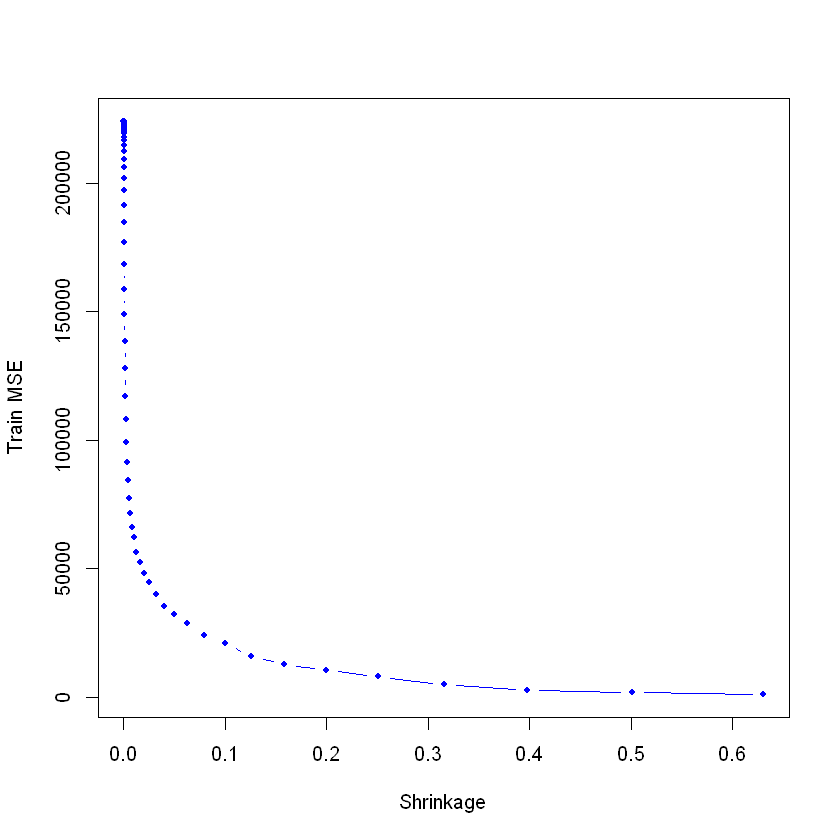

In [50]:
set.seed(103)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

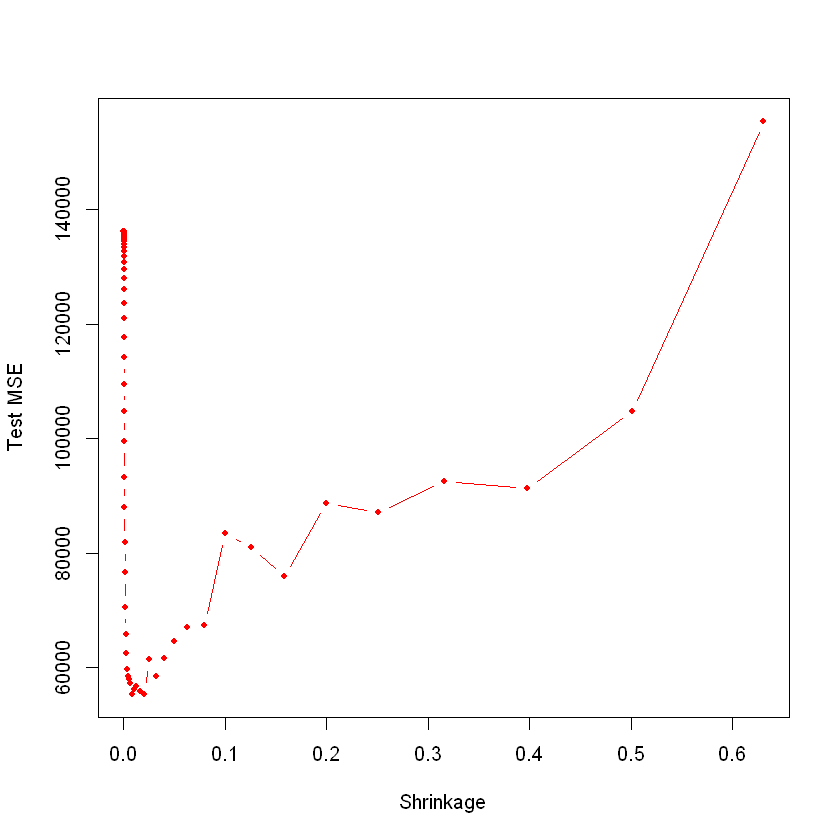

In [51]:
#part d Produce a plot with different shrinkage values on the x-axis and
# the corresponding test set MSE on the y-axis.
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [52]:
lambdas[which.min(test.errors)]

[1] 0.01995262

In [53]:
#part e Compare the test MSE of boosting to the test MSE that results
#from applying two of the regression approaches seen in
#Chapters 3 and 6.
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 124815.2

In [55]:
install.packages('glmnet')
library('glmnet')

also installing the dependencies 'codetools', 'iterators', 'foreach', 'shape'



package 'codetools' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpuiDT2D\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


In [56]:
set.seed(134)
x = model.matrix(Salary ~ ., data = Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(x, y, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

[1] 122285

,var,rel.inf
CHmRun,CHmRun,16.2464377
Walks,Walks,11.6816442
CAtBat,CAtBat,9.9537777
Years,Years,8.6510975
Hits,Hits,8.6259821
CRBI,CRBI,7.0184910
PutOuts,PutOuts,6.4172370
CWalks,CWalks,5.4451756
RBI,RBI,5.2644794
CHits,CHits,3.6809891


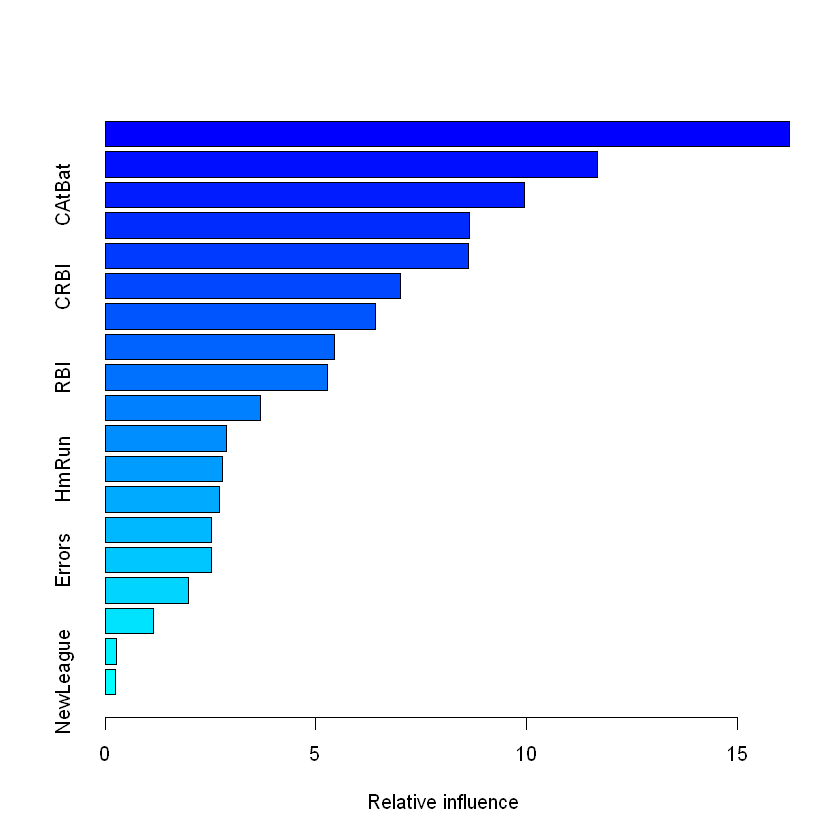

In [57]:
#part f Which variables appear to be the most important predictors in
#the boosted model?
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.best)

#walks and at bat are most important

In [58]:
#part g Now apply bagging to the training set. What is the test set MSE
#for this approach?
set.seed(21)
rf.hitters = randomForest(Salary ~ ., data = Hitters.train, ntree = 500, mtry = 19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

[1] 54992.91

In [ ]:
#not sure thats right?